In [1]:
import numpy as np
from scipy import linalg as la
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))
import random
from matplotlib import pyplot as plt

In [2]:
trainData = np.genfromtxt('concrete/train.csv', delimiter=',')
xTrain = np.transpose(trainData[:,:-1])
yTrain = trainData[:,-1]

In [3]:
testData = np.genfromtxt('concrete/test.csv', delimiter=',')
xTest= np.transpose(testData[:,:-1])
yTest = testData[:,-1]

[[0.898 0.783 0.848 1.3 0.129 1.57 0.996]] [-0.0153]
[0.566]


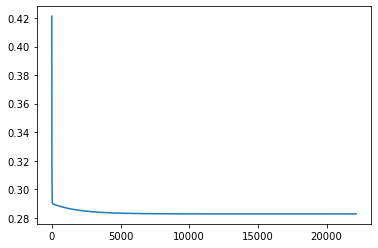

In [4]:
#Batch Gradient Descent
r = 0.125
xLen = xTrain.shape[0]
m = xTrain.shape[1]

wCurr = np.zeros((1,xLen))
bCurr = 0

def anyGT(w,b,n):
    if(b > n):
        return True
    if((w[0,:] > n).any()):
        return True
    return False

dw = np.ones((1,xLen))
db = 1
costs = []
cost = 0
for i in range(m):
    x = xTrain[:,i]
    wx = wCurr.dot(x)
    cost += ((bCurr + wx - yTrain[i])**2)/(2*m)
costs.append(cost)
while(anyGT(dw,db,1e-6)):
    #print(dw[0,:],db)
    dw = np.zeros((1,xLen))
    db = 0
    for i in range(m):
        x = xTrain[:,i]
        wx = wCurr.dot(x)
        dw += (bCurr+wx-yTrain[i]) * x
        db += (bCurr+wx-yTrain[i])
    wCurr = wCurr - r*dw/m
    bCurr = bCurr - r*db/m
    cost = 0
    for i in range(m):
        x = xTrain[:,i]
        wx = wCurr.dot(x)
        cost += ((bCurr + wx - yTrain[i])**2)/(2*m)
    costs.append(cost)
    dw = abs(r*dw/m)
    db = abs(r*db/m)
    
print(wCurr,bCurr)
m = xTest.shape[0]
cost = 0
for i in range(m):
    x = xTest[:,i]
    wx = wCurr.dot(x)
    cost += ((bCurr + wx - yTest[i])**2)/(2*m)
print(cost)
plt.plot(costs)

[[0.317 0.172 0.158 0.842 0.0402 0.76 0.336]] [-0.0588]
[0.619]


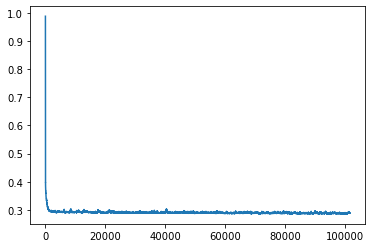

In [92]:
#Stochastic Gradient Descent
random.seed()
r = 0.125
xLen = xTrain.shape[0]
m = xTrain.shape[1]

wCurr = np.zeros((1,xLen))
bCurr = 0

def anyGT(w,b,n):
    if(b > n):
        return True
    if((w > n).any()):
        return True
    return False

costs = []
for i in range(m):
    x = xTrain[:,i]
    wx = wCurr.dot(x)
    cost += ((bCurr + wx - yTrain[i])**2)/(2*m)
costs.append(cost)
dw = np.ones((1,xLen))
db = 1
while(anyGT(dw,db,1e-7)):
    #print(dw,db)
    i = random.randrange(m)
    x = xTrain[:,i]
    wx = wCurr.dot(x)
    dw = (bCurr+wx-yTrain[i]) * x/m
    db = (bCurr+wx-yTrain[i])/m
    wCurr = wCurr - r*dw
    bCurr = bCurr - r*db
    cost = 0
    for i in range(m):
        x = xTrain[:,i]
        wx = wCurr.dot(x)
        cost += ((bCurr + wx - yTrain[i])**2)/(2*m)
    costs.append(cost)
    dw = abs(r*dw)
    db = abs(r*db)
    
print(wCurr,bCurr)
m = xTest.shape[0]
cost = 0
for i in range(m):
    x = xTest[:,i]
    wx = wCurr.dot(x)
    cost += ((bCurr + wx - yTest[i])**2)/(2*m)
print(cost)
plt.plot(costs)

In [90]:
#Calculate Optimal Solution
m = xTrain.shape[1]
b = np.ones(m)
newX = np.transpose(np.insert(np.transpose(xTrain), 0, b, axis=1))
XTX = np.matmul(newX,np.transpose(newX))
XTXI = la.inv(XTX)
XTXIX = np.matmul(XTXI,newX)
W = np.matmul(XTXIX,yTrain)
print(W)

[-0.0152 0.901 0.786 0.851 1.3 0.13 1.57 0.999]
